<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 4 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 19 February 2020, with material from Peter Norvig and Chris Fonnesbeck</div>

# Bayesian Statistical Analysis with PyMC3

***Bayesian*** statistics is not just a particular statistical method. It is a * different, modern, and successful paradigm* for doing statistical analysis. It is different from ***frequentist*** statistics.

A Bayesian model is described by **parameters** ***and*** **uncertainty** in those parameters. The model is described as a **probability distribution** (pdf). Uncertainly in its parameters is *also* described as a probability distribution. 

In the case of Big Data, we have so much data that we know **exactly** what the probability distributions may be. Uncertainties not required. Frequentist statistics work great in these use cases.

Oftentimes however, there are conditions where **not enough data is available**, e.g. snowing with sun glare and white trucks. That is when accidents happen with autonomous vehicles!

<br />
<center>
    <img src="images/autonomous.png" width=400 />
</center>

In this notebook, we introduce the `PyMC3` linrary for probabilistic programming, using a lab.

Run the cell below, we'll use it.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

## 1. Probability Distributions

Let $Z$ be a random variable. Associated with $Z$ is a **probability distribution function** (pdf) that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome (a bin on the x-axis) is the value of the curve on the y-axis. A histogram is an example of a pdf.

We can divide random variables into three categories:

-   **$Z$ is discrete**: Discrete random variables are ***categorical***: They may only assume values on a specified list. You pick the values from a bin. In R, we call these values `factors`. Might as well call them `factors` in python. Movie ratings are an example of a discrete random variables. 


-   **$Z$ is continuous**: Continuous random variable can take on ***arbitrarily exact values***. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.


- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

### Discrete Case
If $Z$ is discrete, then its distribution is called a **probability mass function** (pmf), which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. 

In the discrete case, we turn to python ***dictionaries***. In the continuous case, we use modeling ***functions*** from python libraries like `SciPy`.

## 2. Expectation of a random variable

In probability theory, the *expectation*, or *expected value* of a random variable is what the frequentists would denote.. the ***long-run average value of repetitions of the experiment*** it represents. For example, the expected value in rolling a six-sided die is ... what?

<div style="visibility: hidden">
The average of all the numbers that come up in an extremely large number of rolls is close to 3.5, not 3! 
    
<br />
<center>
    <img src="ipynb.images/average3.5.png" width=400 />
</center>
</div>

<div style="display:none;">
Probability explanation:
$$(1 * \frac 16) + (2 * \frac 16) + (3 * \frac16) + (4 * \frac16) + (5 * \frac16) + (6 * \frac16)$$
</div>

The mathematical definition of **Expectation** is the following: ***The expected value of a discrete random variable is the probability-weighted average of all possible values***. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value. So, for Formula 1 drivers, the Expectation of a Mercedes win is the sum of the probability of a Lewis Hamilton win and the probability of a Vaitteri Bottas win (sometimes divided by two).

The same principle applies to a continuous random variable, except that the **sum** is replaced with the **integral of the variable with respect to its probability density**.

The expected value is a *key* aspect of how one characterizes a probability distribution; it is one type of *location* parameter. By contrast, the **variance**, another *key* value, is a measure of *dispersion* of the possible values of the random variable around the expected value. 

Let $X$ be a random variable with a finite number of finite outcomes $x_1,  x_2, ..., x_k$ occurring with probabilities  $p_1,  p_2, ...,  p_k$, respectively. The expectation of $X$ is defined as

$[X] = x_1 p_1  + x_2 p_2 + ... + x_k p_k$

Since all probabilities $p_{i}$ add up to 1, the expected value is the weighted average, with $p_i$’s being the weights.

The Expectation of a Mercedes win is

$[\text{Mercedes}] = LH p(LH)  + VB p(VB)$

If all outcomes $x_i$ are equiprobable (that is, $p_1 = p_2 = ... = p_k$), then the weighted average turns into the simple average. This is intuitive: the expected value of a random variable is the average of all values it can take; thus the expected value is what one expects to happen ***on average***.

The law of large numbers states that the arithmetic mean of the values almost surely converges to the expected value as the number of repetitions approaches infinity. The expected value is also known as the **expectation**, mathematical expectation, EV, average, mean value, mean, or **first moment**.

Go [here](https://en.wikipedia.org/wiki/Expected_value) for more math..

## 3. Statistical Inference

**Statistical inference** is the process of learning from incomplete or error-contaminated data. We account for this incompleteness and imperfection using either a sampling model with incomplete samples or errors in measurement.

### Statistical hypothesis testing in frequentist statistics

The *de facto* non-Bayesian (always *frequentist*) standard for statistical inference is called **statistical hypothesis testing**. The goal of hypothesis testing is to evaluate a **null hypothesis**. The null hypothesis is when two statistical groups are *not different*. There are two possible outcomes:

- Reject the null hypothesis
- Accept the null hypothesis

Rejection occurs when a test statistic is higher than some pre-specified threshold valuel. Acceptance occurs when it's lower.

Pharmaceutical companies run null hypothesis tests ***all the time***. Their null test is whether the drug group's statistics on recovery is sufficiently different from the placebo group. This test is conducted in what is called *double-blind* circumstances.

Setting up a statistical test involves several subjective choices by the user that are rarely justified based on the problem or decision at hand. Choices are often based on arbitrary criteria, including "statistical tradition" (Johnson 1999). The resulting evidence is indirect, incomplete, and typically overstates the evidence against the null hypothesis (Goodman 1999).

The results of statistical hypothesis tests are very easy to misinterpret. 

### Bayesian Estimation 

Instead of testing, a more informative and effective approach for inference is based on **estimation**, which can be frequentist or Bayesian. That is, rather than testing whether two statistical groups are different, let's estimate *how different* they are by **modeling them first**, and then comparing **models**.

<center>
    <img src="ipynb.images/manU.png" width=300 />
</center>

Additionally, we include an estimate of **uncertainty** associated with that difference, which includes uncertainty due to our lack of knowledge of model parameters, called **epistemic uncertainty**, and uncertainty due to the inherent stochasticity of the modeling system, called **aleatory uncertainty**.

### Bayesian vs Frequentist Statistics: *What's the difference?*

Any statistical inference paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*. Also called **dependent variables**.
2. Some **data** which has been observed, and hopefully contain information about the parameters. Also called the **independent variables**.
3. One or more **models** that relate the data to the dependent parameters. The model is the **instrument used to learn**.

For example, you learn about the real world from the model that your parents built for you, before you can leave home to see the real thing, then you learn by observing and building your own models (curves in your brain).

>**CAREFUL**: Oftentimes, there are also independent columns (variables) and dependent columns (variables) in the data. Do not confuse these dependent variables (in the data), with the dependent variables in the model.

### Frequentist World View

In frequentist statistics:

- **Data** observed is considered **random**, because it is the realization of random processes and hence will vary each time one goes to observe the system.


- Model **parameters** are considered **fixed**. A parameter's true value may be uknown but fixed. For example, Jesus Christ is a central parameter in the Christian World Model. Christians will say the world order may be random because of human misgivings, but Jesus Christ and his compassion is fixed and steadfast.

In mathematical notation, this implies a general model of the form:

<div style="font-size:20px">
\\[f(y \; | \; \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on fixed model parameters \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for unknown data parameters. Estimators are formulae that return estimates for particular data parameters as a function of other data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

We are not going to get into this. We have already seen hypothesis testing in classical statistics, and that is as far as we'll go.

In a frequentist world, new estimators need to be derived for every parameter $\theta$ introduced.

### Bayesian World View

In Bayesian statistics:

- Data is considered **fixed**. The process that generated it may have been a random process, but once stored in your lab notebook or spreadsheet, it does not change.


- Model parameters may not be random, but Bayesians use probability distribtutions to describe their uncertainty in values, and are therefore ***treated as random***! In some cases, it is useful to consider parameters as having been sampled from probability distributions. For example, some Christians may postulate that world order is predetermined, however Jesus Christ's compassion may vary because sometimes he gets exasperated by his followers (yikes!).

This implies the following form:

<div style="font-size:20px">
\\[p(\theta \; | \; y)\\]
</div>

This can be called an ***inverse probability***, because it infers from observations to parameters, or from **effects** to **causes**. That is an inverse problem! But that is how we build models!

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**, and the inverse probability is called a **posterior**.

## Bayes' Formula

While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities. 

The equation expresses how our belief about the value of \\(\theta\\) (parameters), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The denominator \\(p(y)\\) usually ***cannot be computed directly***, and is actually the expression in the numerator integrated over all possible model parameters \\(\theta\\):

In the continuous case, this is Bayes' formula:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\int Pr(y\;|\;\theta)Pr(\theta) d\theta}\\]
</div>

The ***intractability*** of this integral led to the under-utilization of Bayesian methods by statisticians. But with the advent of computers and clever algorithms like [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), this has changed.

### Prior

The **prior distribution** $Pr(\theta)$ characterizes what is known about an unknown quantity $\theta$ before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood

The **likelihood** $Pr(y\;|\;\theta)$ represents the information in the observed data (or evidence), and is used to update **prior** distributions to **posterior** distributions. 

The posterior varies the parameter(s) while holding the observations constant, the likelihhod caries the data while holding the parameter(s) constant.

The denominator is called the **evidence**, or the **marginal likelihood**.

## Bayesian Inference, in 3 Easy Steps

[Gelman et al. (2013)](http://www.stat.columbia.edu/~gelman/book/) (the *bible* in statistics theory) describes the process of conducting Bayesian statistical analysis in 3 steps:

### Step 1: Specify a probability model

Bayesian statistics involves using ***probability models*** to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density function (pdf).

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta \;|\; y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why *posterior*? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed the data \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. *Usually*, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest was the major contributing factor for the slow adoption of Bayesian methods for data analysis. 

**But**, once the posterior distribution is calculated, you get:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

It is important that the model and its outputs be assessed before using outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- Does the model fit data?
- Are the conclusions reasonable?
- Are the outputs sensitive to changes in model structure?

***That is why***, when building a model from data, we earmark some 20% of the data and ignore it while building the model. Then we compare model output from part of that 20% (independent parameters) and verify it matches the other part of the 20% (dependent parameters or covariates).

## In search of  $\alpha, \beta, \theta, \lambda, \omega, \cdots$

Building a model is tantamount to searching for a **statistical profile and its *parameters***, parameters which are most often denoted by greek letters. Yes, that means you need to learn the [**greek alphabet**](https://en.wikipedia.org/wiki/Greek_alphabet).

Suppose we are given some data and we are told that there is a process that yields this data, and which we must try to model. Whether we're fitting a discrete or continuous model, we must pick a statistical profile (a pdf), usually from a list of well-known profiles, and then determine its parameter(s), let's call them $\lambda$. 

>**NOTE**: The expected value of a random variable is often either equal to $\lambda$ (discrete case, Poisson distribution), or to the inverse of $\lambda$ (continuous case, exponential distribution).

But $\lambda$ is hidden from us! We see only $Z$, the data, and must go ***backwards*** to try and determine the $\lambda$ to build the best possible model of our data, i.e. the model that yeilds the data we observe. The problem is difficult because there is no one-to-one mapping from $Z$ to the model's $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, and since $\lambda$ is never actually observed, no one can say for certain which method is best! 

>Inverse problems are hard to solve!

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is ***likely to be*** by assigning a probability distribution to $\lambda$. 

>**WORTH REPEATING**: That probability distribution is not the profile of your model, the probability distribution of your model! This is a different probability distribution, one for each parameter of your model!

>**PRIME NUMBERS**: Remember your prime number generator lambda? What happens when the prime numbers you're looking for are larger than the number of atoms in the universe? This describes recent research on ***prime number clustering***. It is *such a hard problem*, that researchers talk about the *probability of a number being prime*! More specifically, as it relates to the *spacing* between prime numbers, the distribution of prime numbers. Read [here](https://en.wikipedia.org/wiki/Polignac%27s_conjecture) about **Polignac numbers**, and here about giants in this field, [Yitan Zheng](https://en.wikipedia.org/wiki/Yitang_Zhang), and [James Maynard](https://en.wikipedia.org/wiki/James_Maynard_(mathematician)).

Frequentists will say.. $\lambda$ is fixed, it is ***not*** random! How can you assign probabilities to values of a non-random variable? [Sacrebleau](https://en.wikipedia.org/wiki/Sacrebleu).

</br >
<center>
<img src="https://vignette.wikia.nocookie.net/tintin/images/0/07/Haddock_sword.jpg" width="300" />
Frequentists are angry at Bayesians
</center>

But Bayesians easily *assign* probabilities to model parameters by interpreting them as *beliefs*. And it is entirely acceptable to have *beliefs* about the model parameter $\lambda$. It is the data that is fixed, for Bayesians. Model parameters vary according to belief.

## Lab: Radon gas

Let's practice: Let's do Bayesian statistical inference for a specific dataset. 

We'll use Gelman et al.'s famous (2007) [**radon dataset**](http://www.stat.columbia.edu/~gelman/arm/examples/radon/). In this dataset, the amount of the radioactive gas radon has been measured among different households in all counties of the great state of Minnesota (MN). Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among different types of soil.

>  The US EPA has set an action level of 4 pCi/L. At or above this level of radon, the EPA recommends you take corrective measures to reduce your exposure to radon gas.

Let's import the dataset and pretty-view the first 5 rows with `pandas`:

In [3]:
radon = pd.read_csv('data/radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


Let's focus on the (log) radon levels measured in a single county: The county of `Hennepin`.

Why are we using the **log** of the Radon measurement? To ***squash*** the measurement as much as possible into a single order of magnitude.

Suppose we are interested in the following point statistics:

- Whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
- The probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

Greater than 4 means ***danger***!!

What is the first thing we do in a data science problem?

- Evaluate the histogram of the data so we can match it to a well-known statistical function.

Seaborn's `distplot` computes the histogram *and also fits it to a curve*. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for the API.

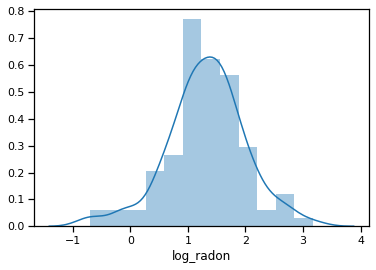

In [5]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [6]:
# this confirms that a pdf is a function of *one* variable
hennepin_radon.shape

(105,)

### Pick the model profile

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- A **likelihood function(s)** for the observations
- **Priors** for all unknown quantities

The measurements look approximately normal (gaussian), so, as good statisticians, let's start by **assuming a normal distribution as the sampling distribution (likelihood) for the data**.

* This is the most common approach to building a Bayesian model: Get the histogram, see if it looks like Poisson, Normal, Exponential, or a bunch of other analytic pdfs (like the Beta and Gamma distributions), and try to fit the data to a model of the distribution by varying the distribution's paramter(s).

So we pick a **Normal distribution**, which is described by its two paramaters $\mu$ (mean) and $\sigma$ (standard deviation):

$$y_i \sim N(\mu, \sigma^2)$$

Note that **Normal** and **Gaussian** is the same thing because Gaussian distributions are the most *normal*! They are the prettiest data imaginable!

So we have 2 unknowns in the model so far: the **mean** and **standard deviation** of the likelihood. 

Now we SWAG (**S**illy **W**ild-**A**ss **G**uess) our *priors*. We will model them as **probability density functions**, too!

>**NOTE**: The parameters of our model are modelled as pdfs themselves!

<center>
    <img src="ipynb.images/dog-chase-tail.jpg" width=300 />
</center>

### Choice of priors

How do we choose pdfs for parameters $\mu$ and $\sigma$? 

There are several considerations:

- Discrete vs continuous values
- The support of the variable
- The available prior information

While there may likely be prior information about the distribution of radon values, we will assume ***no prior knowledge*** (about the priors), and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use ***another normal distribution*** here, and specify a *large* variance, $10^2$, to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). Let's choose a [**uniform**](http://mathworld.wolfram.com/UniformDistribution.html) pdf prior, bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take. That way, we are sure to capture the real value, somewhere in -between.

$$\sigma \sim U(0, 10)$$

Note that I picked 0 as the mean for the pdf of the model parameters. That is a common practice.

We now encode these in a Python model, using the `PyMC3` library.

Introducing PyMC3
-----
Bayesian programming is called ***probabilistic programming***, and it is probabilistic in that we create probability models using programming variables as the model's components. Model components are first-class primitives within Bayesian libraries.

>   Another way of thinking about this: unlike a traditional program, which only runs in the forward directions, a probabilistic program is run in both the forward and backward direction. It runs forward to compute consequences of assumptions it contains about the model, but also backward from the data to constrain possible explanations. In practice, many probabilistic programming systems will cleverly interleave forward and backward operations to efficiently home in on the best explanations.  - [Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013]( https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1)

> ### Bayesian Software
> There is a good amount of software options for Bayesians, including both open source software (*e.g.*, [Stan](https://en.wikipedia.org/wiki/Stan_(software)), PyMC3, JAGS, emcee) and commercial (*e.g.*, SAS, Stata). Your instructor happens to love `PyMC3`.

PyMC3 is a Python library for programming Bayesian analysis; see [here](https://doi.org/10.7717/peerj-cs.55). It's a  wonderful package. Looky [here](https://docs.pymc.io/) for its API and docs. It helps us solve tough inverse problems and extract a model from the data. We will use its `Metropolis()` and `NUTS()` APIs most often, and we'll even tinker with the Metropolis algorithm next week.

We will model our radon dataset using PyMC3.  

PyMC3 used to rely on [**theano**](https://en.wikipedia.org/wiki/Theano_(software), a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently, and which we will revisit when we focus on machine learning. Theano is the brainchild of [Yoshua Benjio](https://en.wikipedia.org/wiki/Yoshua_Bengio) of the University of Montreal's [MILA](https://mila.quebec/en/) laboratory. In my opinion, it's the most famous university lab associated to artificial neural networks and deep learning. It's pretty [well-funded](http://nouvelles.umontreal.ca/en/article/2017/09/15/facebook-invests-over-7m-u.s.-in-mila-and-ai-research-in-montreal/).

`theano` is slowly being deprecated because other libraries like facebook's `Torch` and Google's `TensorFlow` now include the same features. Old PyMC3 versions still uses theano, but the newer versions don't, they use [**tensorflow**](https://en.wikipedia.org/wiki/TensorFlow) instead.

`theano` is notorious in that it is often difficult to install, especially on the Mac. One option is to run the notebook on the Cloud, or to use `Sampyl` instead of `PyMC3`.

For probabilistic programming, you write a program in Python that builds expressions for Theano. You still have to declare variables $a,b,c$ and give their types $(int, int, int)$, build expressions for how to put those variables together, like $a^b + c$, and compile expression graphs to functions $Pow(a,b,c)$ in order to use them for computation. What theano builds in return is a super-fast callable object from a purely symbolic graph, optimizes the graph, and even compiles some or all of it into native machine instructions. More on Theano [here](http://www.deeplearning.net/software/theano/). 

For older theano versions of PyMC3 (don't do this if you're using a new version of PyMC3):
- On Windows, from the Start menu, search for and open `Anaconda Prompt`. On MacOS, open Launchpad, then click the Terminal icon. On Linux, open a Terminal window. Now in these windows, type `conda install -c mila-udem theano pygpu`. Wait until success. Then in that same terminal, type `conda install pymc3`. Wait until success.

PyMC3 code is easy to read. The only novel thing should be the syntax. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as **probabilistic variables**. 

Then execute the following cell. We name our model and define our priors as the pdf's we mentionned above. Notice priors are most often given greek variable names. The parameters for the priors (the parameters for the parameters of our model, also sometimes called *hyperparameters*) were really just silly guesses, and you have to learn to start with good guesses. That speeds up convergence *a lot*.
```(python)
from pymc3 import Model, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)
```

In [9]:
from pymc3 import Model, Uniform, Normal

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

All that remains is to add the **likelihood**, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:
```(python)
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)
```

In [10]:
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called [**variational inference**](https://www.cs.jhu.edu/~jason/tutorials/variational.html). This will estimate the posterior distribution using an optimized approximation, and then draw samples from it. 

- When you execute the cell below, wait for a pink band to appear. Do not move to another cell before the pink band appears and the computation completes. It may take your laptop some time before the pink band appears, and another 30 seconds for the computation to converge.
```(python)
from pymc3 import fit

with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)
```

In [11]:
from pymc3 import fit

with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.32: 100%|██████████| 10000/10000 [00:02<00:00, 4068.24it/s]
Finished [100%]: Average Loss = 136.28


What we did is fit the best possible analytical gaussian model to the `hennepin_radon` dataset by picking various values of the $\mu$ and $\sigma$ parameters, by varying them across their own probability distributions, which we specified. Actually, PyMC3 did the work, and we watched :-)

Now we're ready to plot our posterior, which is the best possible values for $\mu$ and $\sigma$ that PyMC3 evaluated for us. In other words, the values of $\mu$ and $\sigma$ that result in the best possible $N(\mu, \sigma^2)$.
```(python)
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');
```

/Applications/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


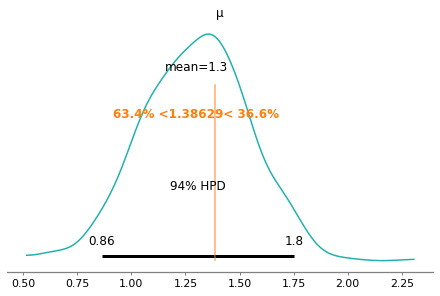

In [12]:
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **high density interval**. 

The output

    83.1% < 1.38629 < 16.9%%
    
informs us that the probability of $\mu$ being less than $\log(4)$ is 83.1%% and the corresponding probability of being greater than $\log(4)$ is 16.9%.

> **Answer**: The posterior probability that the mean level of household radon in Henneprin County is greater than 4 pCi/L is 0.17.

No questions about the standard deviation, but let's plot it, too:
```(python)
plot_posterior(samples, varnames=['σ'], ref_val=0.8, color='LightSeaGreen');
```

/Applications/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


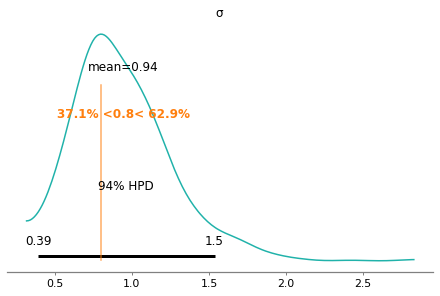

In [13]:
plot_posterior(samples, varnames=['σ'], ref_val=0.8, color='LightSeaGreen');

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**.

$$p(z \;| \; y) = \int_{\theta} p(z \;| \; \theta) p(\theta \; | \; y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

The posterior predictive distribution accounts for uncertainty about $\theta$. We should refrain from plugging in a single best estimate $\hat{\theta}$ for $\theta$, because it ignores uncertainty about $\theta$, and because a source of uncertainty is ignored, the predicted distribution will be too narrow (extreme values of $\tilde {x}$ will occur more often than the posterior distribution suggests).

The posterior distribution of possible $\theta$ values depends on $\mathbf {X}$: $p(\theta \; | \; \mathbf {X} )$. And the posterior predictive distribution for any new datapoint $\tilde {x}$ given $\mathbf {X}$ is calculated by marginalizing the distribution of $\tilde {x}$ given $\theta$ over the posterior distribution of $\theta$ given $ \mathbf {X}$. That is the integral above. See [here](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) for more explanation.

We can estimate the probability that a given household has a log-radon measurement larger than one from the posterior samples of the parameters in the model:

In [15]:
mus = samples['μ']
sigmas = samples['σ']

```(python)
radon_samples = Normal.dist(mus, sigmas).random()
```

In [16]:
radon_samples = Normal.dist(mus, sigmas).random()

```(python)
(radon_samples > np.log(4)).mean()
```

In [17]:
(radon_samples > np.log(4)).mean()

0.472

> **Answer**: The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.43.

### Model checking

***How do we know our model is any good?***

It's important to check the fit of the model, to see if the underlying assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data. We did not do this, but you should earmark a certain percentage of your data just for testing (and not use it for training or modeling).

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from our `sns.distplot` example.
```(python)
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()
```

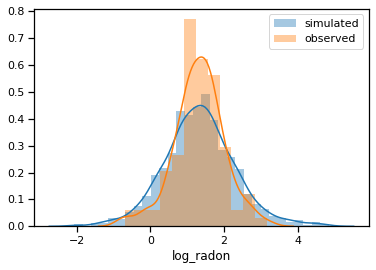

In [18]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

### Prior sensitivity

It is also important to check the sensitivity of your choice of priors to the resulting inference. What if we had guessed completely different hyperparameters?

Here's the same model, with drastically different (though still uninformative) priors:
```(python)
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)
```

In [19]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:

    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)

    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)

    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.98: 100%|██████████| 10000/10000 [00:02<00:00, 4053.60it/s]
Finished [100%]: Average Loss = 123.94


```(python)
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');
```

/Applications/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


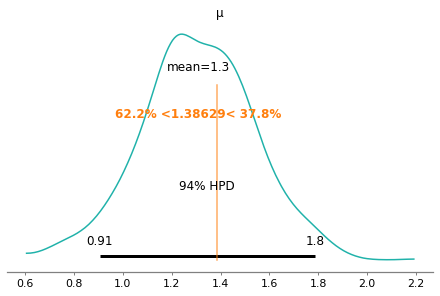

In [21]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

Here is the original model for comparison:
```(python)
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');
```

*Not much difference* gives us a degree of confidence that our results are good!

## Conclusion

The most difficult part of Bayesian estimation is the part that models the parameters of the pdf you picked as your model ***as pdfs themselves***. You might think that it's picking the right statistical profile that matches the histogram of the dataset, but that's usually not that hard. Picking the shape of the pdf for each model parameter is harder because you don't have a physical profile to match! And then, you also need to pick initial conditions for these parameters. 

It's all about experience! If you ***make the right choices*** (and that is often the *art* behind Bayesian inference), then Bayesian packages like `PyMc3` will do all the work for you, and you will get a good **model** of your dataset, and then you can throw away all the historical data and use that model to do predictions. If you make the *wrong choice*, most often your computation won't converge or you will get very strange results. In which case, go watch an episode of GoT, then start from scratch.

## References and Resources

- Goodman, S. N. (1999). Toward evidence-based medical statistics. 1: The p-value fallacy. Annals of Internal Medicine, 130(12), 995–1004. http://doi.org/10.7326/0003-4819-130-12-199906150-00008
- Johnson, D. (1999). The insignificance of statistical significance testing. Journal of Wildlife Management, 63(3), 763–772.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
-  Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.